# Synthesize waveforms modeled by SEOBNR approximations

Use PyCBC library which provides a variety of models.<br>
Attention: PyCBC uses LAL to calculate models. In case of doubts search also in the LAL library documentation.

In [1]:
#http://pycbc.org/pycbc/latest/html/waveform.html?highlight=seobnrv4hm

# Import necessary libraries.
%matplotlib inline

from pycbc.waveform import get_td_waveform
import pycbc.waveform
import pylab
pylab.rcParams['figure.dpi'] = 200
import numpy as np

## 1. Generate waveforms for the same binary system using different models

For a binary system $m_1 = 14 M_\odot$, $m_2 = 190 M_\odot$ 

The output of this function are the "plus" and "cross" polarizations of the gravitational-wave signal as viewed from the line of sight at a given source inclination (assumed face-on if not provided)

In [2]:
pycbc.waveform.waveform._lalsim_enum
apx = ["SEOBNRv2", "SEOBNRv4", "SEOBNRv4HM"]
#apx = ["SEOBNRv4", "SEOBNRv4HM"]
wfm = ["SEOBNRv4HM"]

for i, a in enumerate(apx, start=0):
    wfm.append(get_td_waveform(approximant=a,                         
                         mass1=190,
                         mass2=14,
                         spin1x=0,  # For v4HM Must be zero lalsimulation/lib/LALSimInspiral.c
                         spin1y=0,  # Must be zero
                         spin1z=0.5,
                         spin2x=0,  # Must be zero
                         spin2y=0,  # Must be zero
                         spin2z=0,
                         distance=40,
                         coa_phase=1.2,
                         inclination=90,
                         long_asc_nodes=0,
                         eccentricity=0,
                         mean_per_ano=0,
                         delta_t=1.0/4096,
                         f_lower=25
                        ))

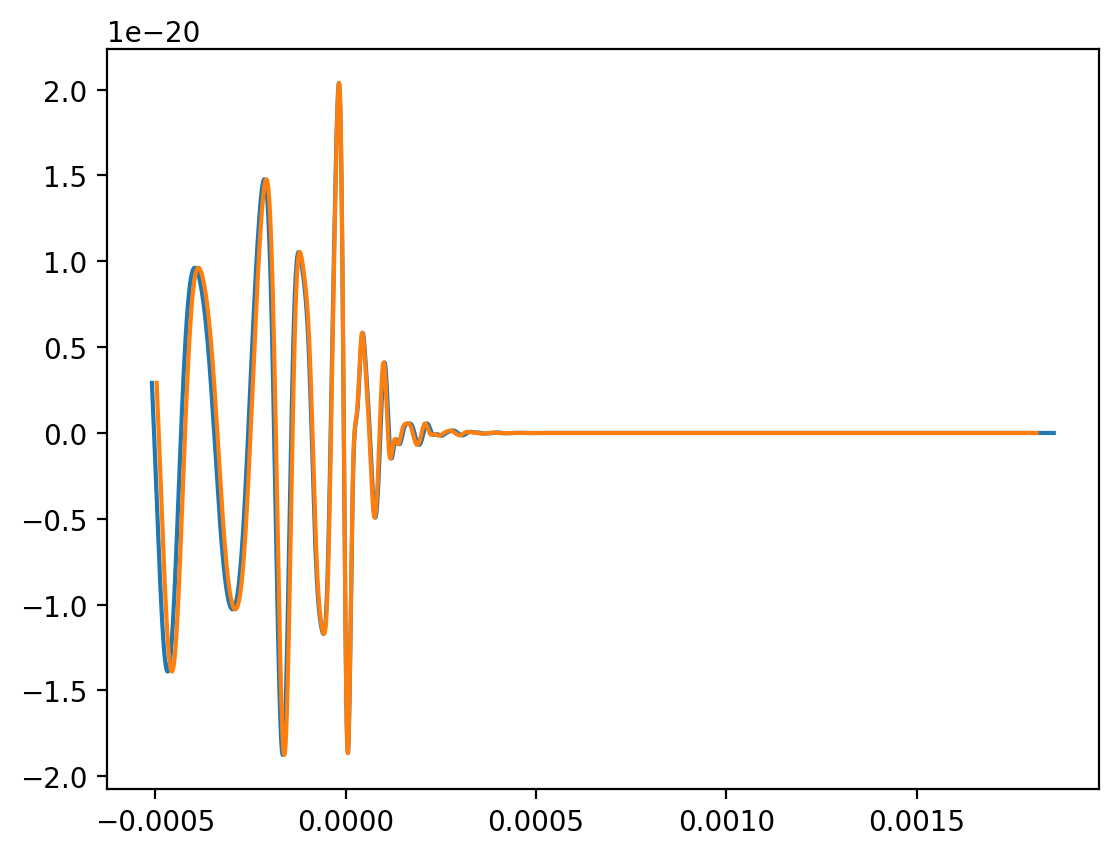

In [4]:
pycbc.waveform.waveform._lalsim_enum
#apx = ["SEOBNRv2", "SEOBNRv4", "SEOBNRv4HM"]
#apx = ["SEOBNRv4", "SEOBNRv4HM"]
apx = ["SEOBNRv4HM"]
wfm = []

for i, a in enumerate(apx, start=0):
    wfm.append(get_td_waveform(approximant=a,                         
                         mass1=190,
                         mass2=23.75,
                         spin1x=0,  # For v4HM Must be zero lalsimulation/lib/LALSimInspiral.c
                         spin1y=0,  # Must be zero
                         spin1z=0.5,
                         spin2x=0,  # Must be zero
                         spin2y=0,  # Must be zero
                         spin2z=0,
                         distance=40,
                         coa_phase=1.2,
                         inclination=90,
                         long_asc_nodes=0,
                         eccentricity=0,
                         mean_per_ano=0,
                         delta_t=1.0/4096,
                         f_lower=25
                        ))
    pylab.plot(wfm[0][0].sample_times/(190+23.75), wfm[0][0])
    wfm.append(get_td_waveform(approximant=a,                         
                         mass1=95,
                         mass2=11.875,
                         spin1x=0,  # For v4HM Must be zero lalsimulation/lib/LALSimInspiral.c
                         spin1y=0,  # Must be zero
                         spin1z=0.5,
                         spin2x=0,  # Must be zero
                         spin2y=0,  # Must be zero
                         spin2z=0,
                         distance=40,
                         coa_phase=1.2,
                         inclination=90,
                         long_asc_nodes=0,
                         eccentricity=0,
                         mean_per_ano=0,
                         delta_t=1.0/4096,
                         f_lower=25
                        ))
    pylab.plot(wfm[0][0].sample_times/((95+11.875)*2.05), wfm[0][0])

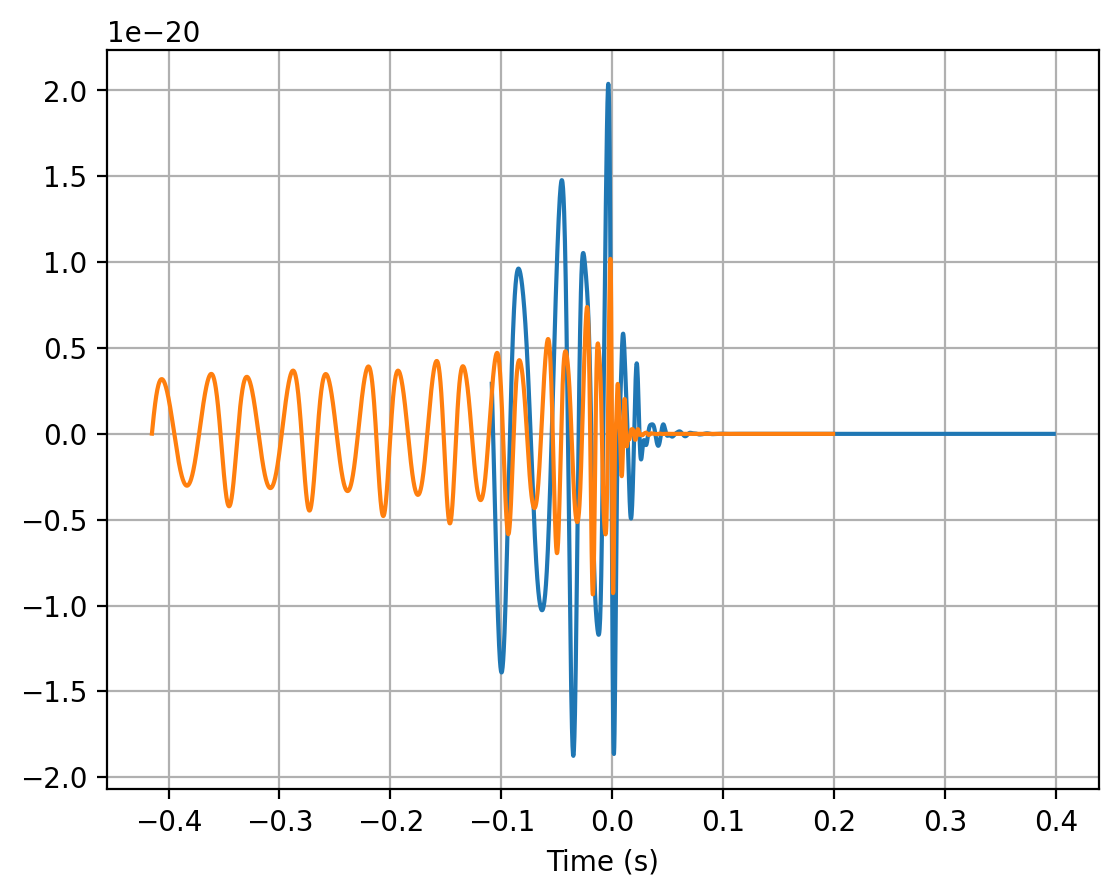

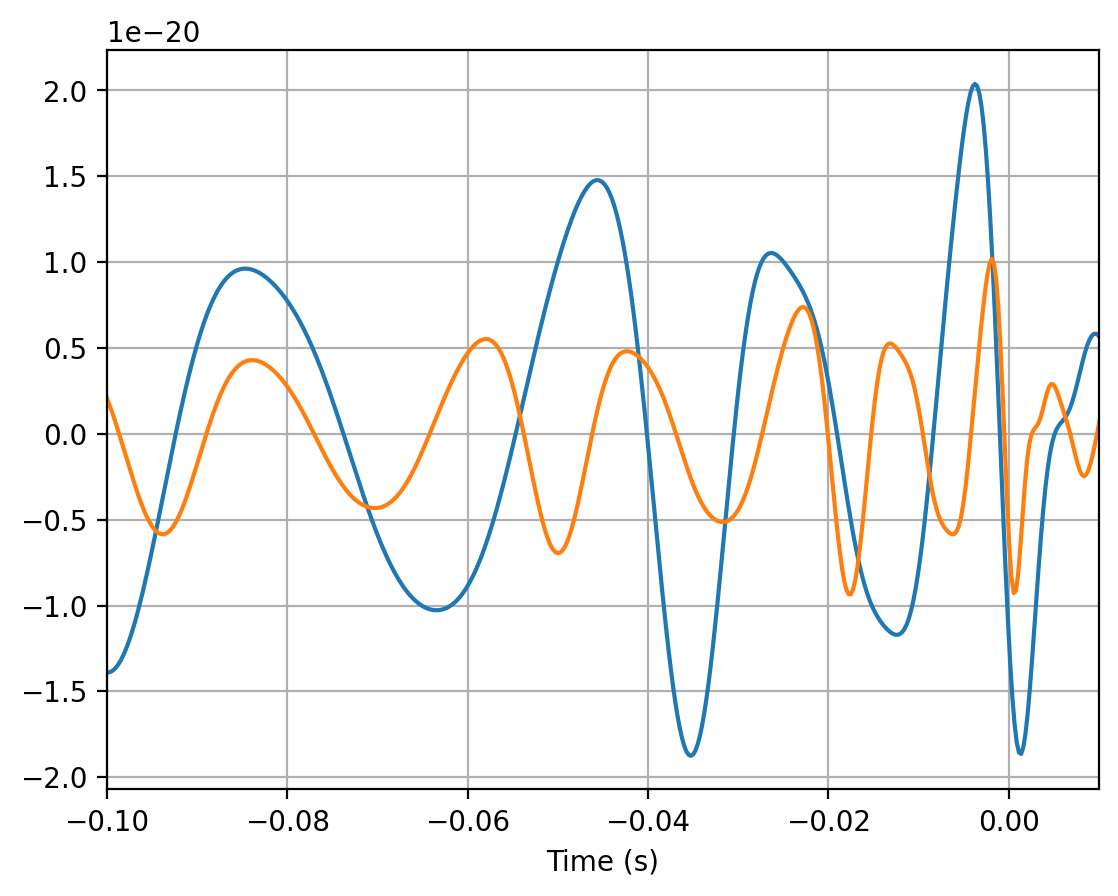

In [5]:
for i, model in enumerate(wfm, start=0):
    hp = model[0]
    #hc = model[1]
    pylab.plot(hp.sample_times, hp)
    #pylab.plot(hp.sample_times, hc, label='Cross Polarization')
pylab.xlabel('Time (s)')
#pylab.legend()
pylab.grid()
pylab.show()

for i, model in enumerate(wfm, start=0):
    hp = model[0]
    pylab.plot(hp.sample_times, hp)
    #pylab.plot(hp.sample_times, hc, label='Cross Polarization')
pylab.xlabel('Time (s)')
pylab.xlim(-.1, .01)
#pylab.legend()
pylab.grid()
pylab.show()

## 2. Plot the waveforms for plus and cross polarization.

Zoom in the merger phase.

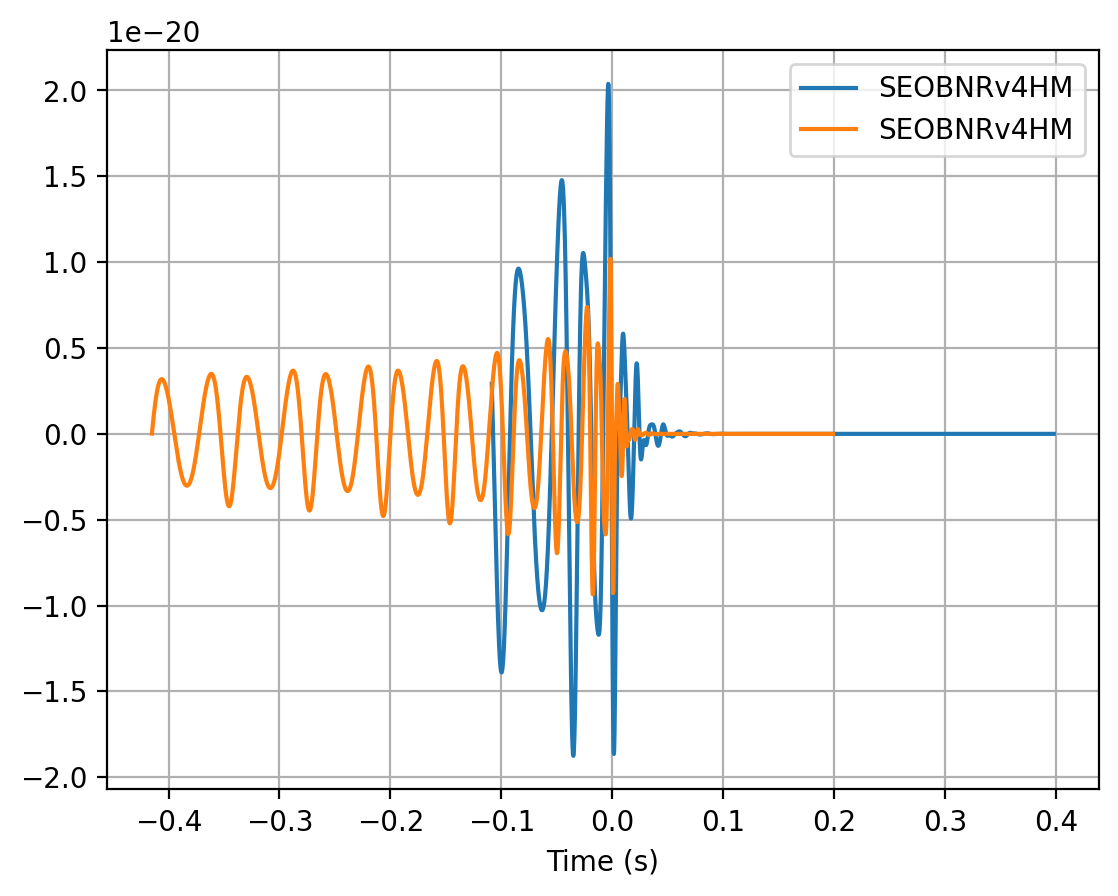

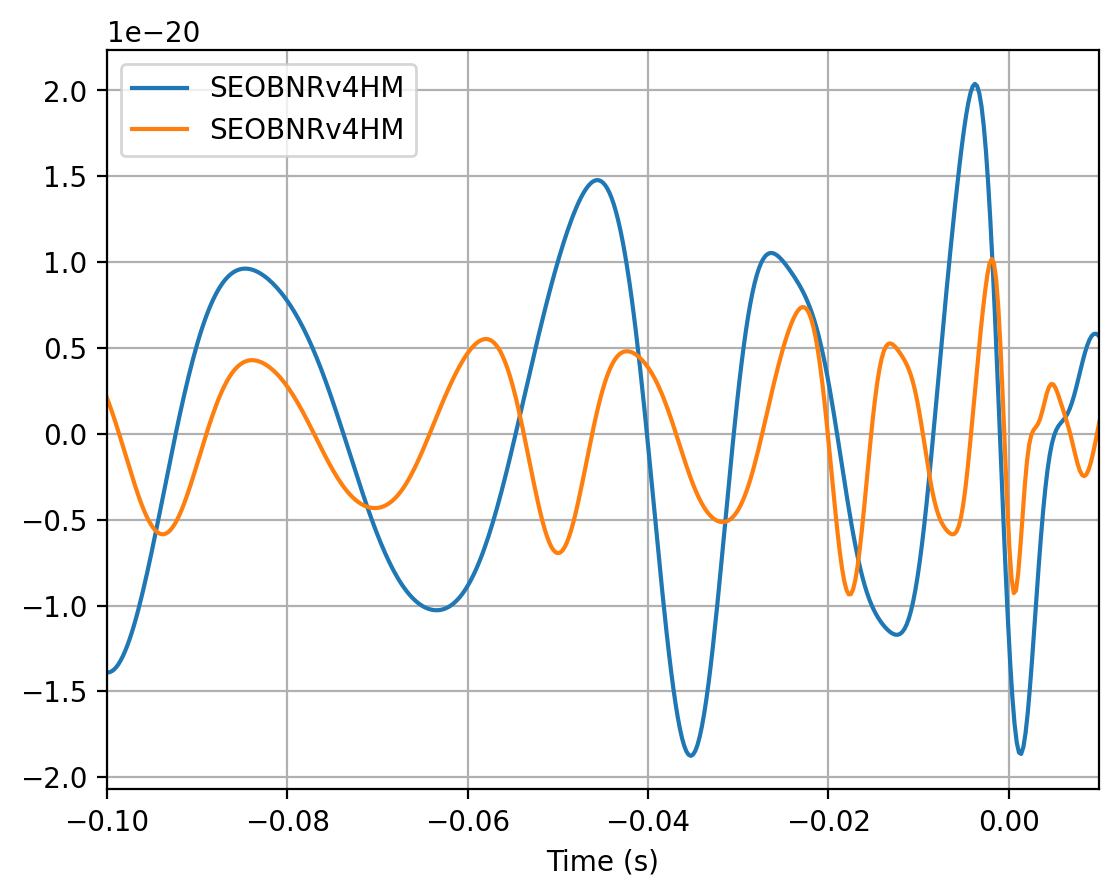

In [6]:
for i, model in enumerate(wfm, start=0):
    hp = model[0]
    #hc = model[1]
    pylab.plot(hp.sample_times, hp, label=apx[i-1])
    #pylab.plot(hp.sample_times, hc, label='Cross Polarization')
pylab.xlabel('Time (s)')
pylab.legend()
pylab.grid()
pylab.show()

for i, model in enumerate(wfm, start=0):
    hp = model[0]
    pylab.plot(hp.sample_times, hp, label=apx[i-1])
    #pylab.plot(hp.sample_times, hc, label='Cross Polarization')
pylab.xlabel('Time (s)')
pylab.xlim(-.1, .01)
pylab.legend()
pylab.grid()
pylab.show()

In [7]:
wfm[0][0].duration

0.506591796875

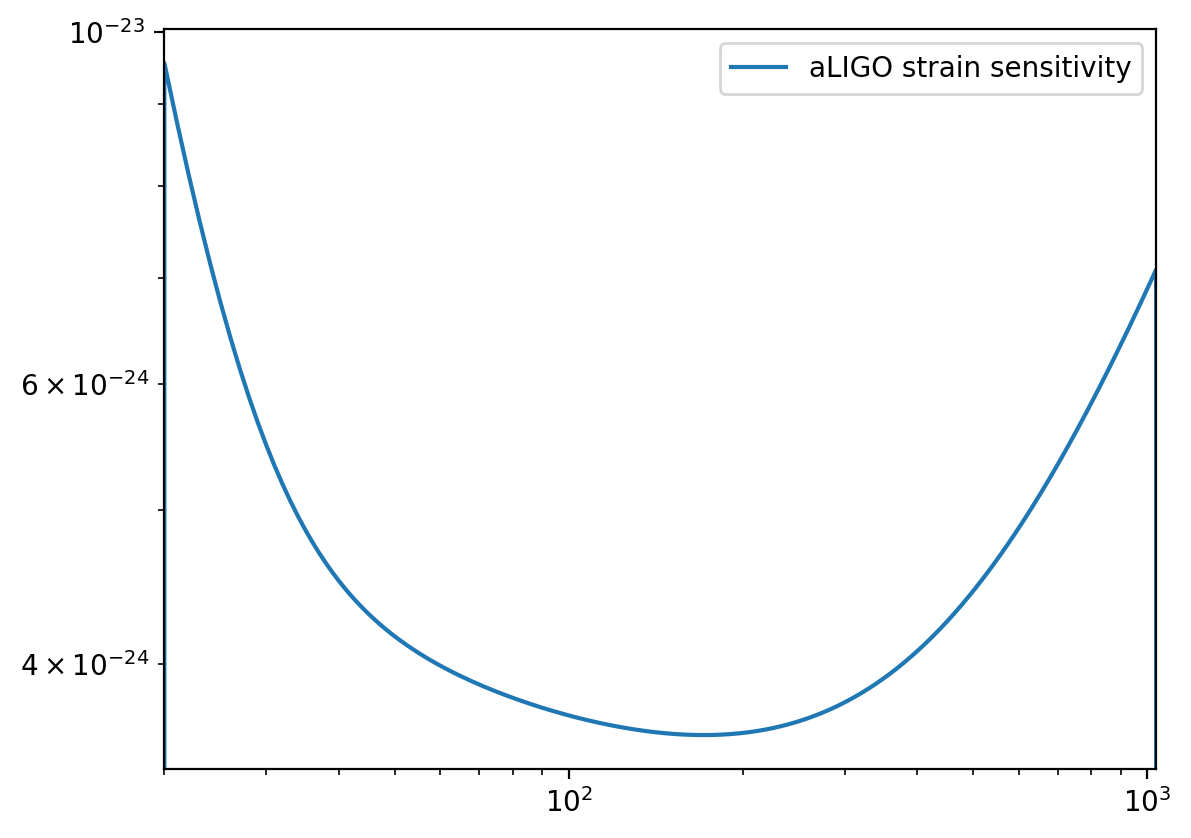

In [8]:
from pycbc.psd import aLIGOZeroDetHighPower

tlen = len(wfm[0][0])

# Generate the aLIGO ZDHP PSD
f_low = 30
delta_f = 1.0 / 0.676513671875
flen = tlen//2 + 1
psd = aLIGOZeroDetHighPower(flen, delta_f, f_low)  # Power Spectral Density

pylab.plot(np.sqrt(psd), label="aLIGO strain sensitivity")  # Amplitude Spectral Density
#https://physics.stackexchange.com/questions/615349/amplitude-spectral-density-vs-power-spectral-density
pylab.xlim(20, flen-1)
pylab.xscale('log')
pylab.yscale('log')
pylab.legend()

## 3. Generate a library of chirp signals.

Consider varying masses and distance

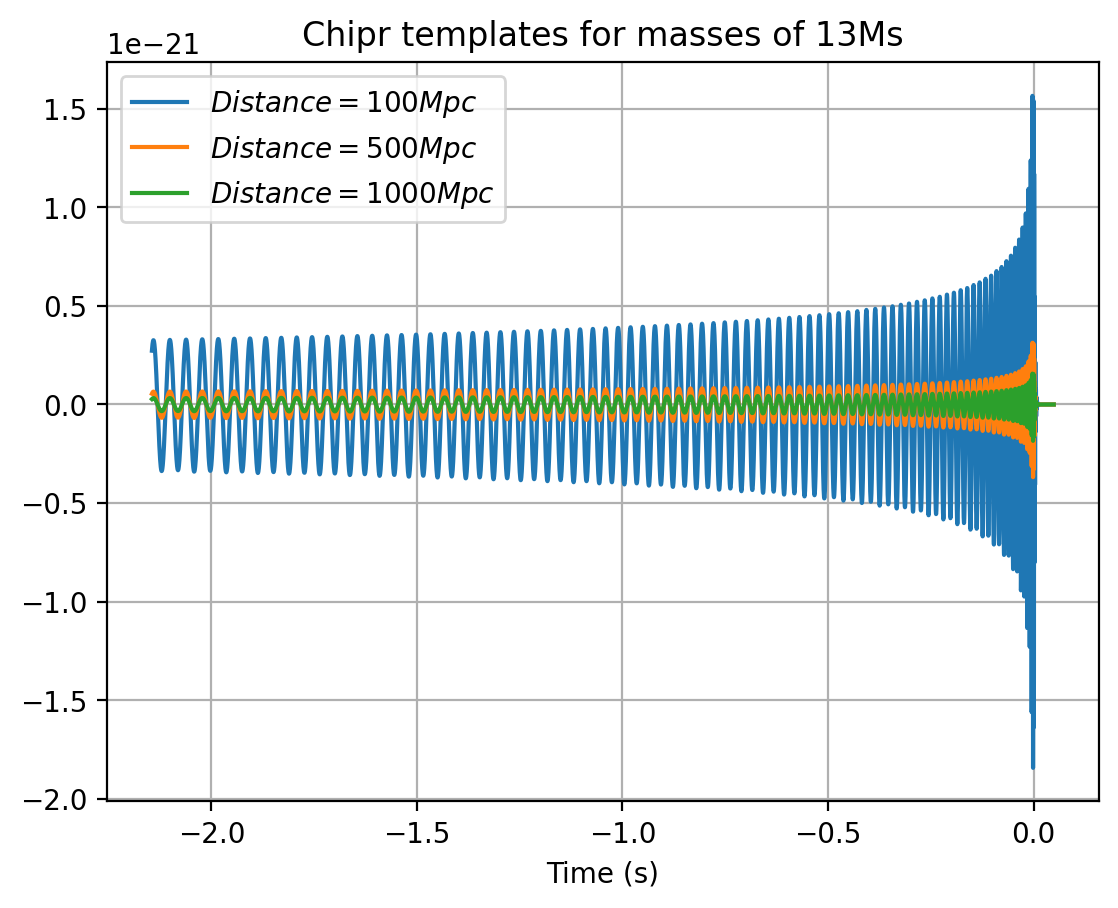

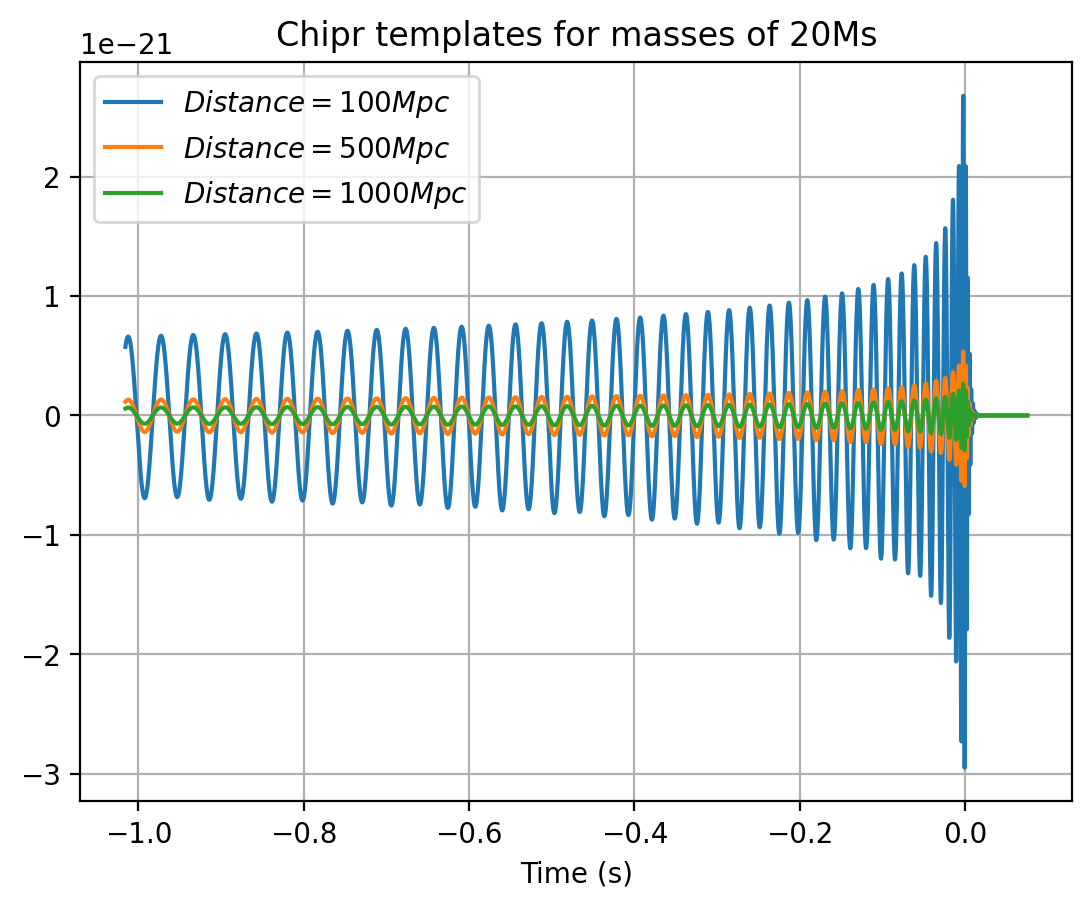

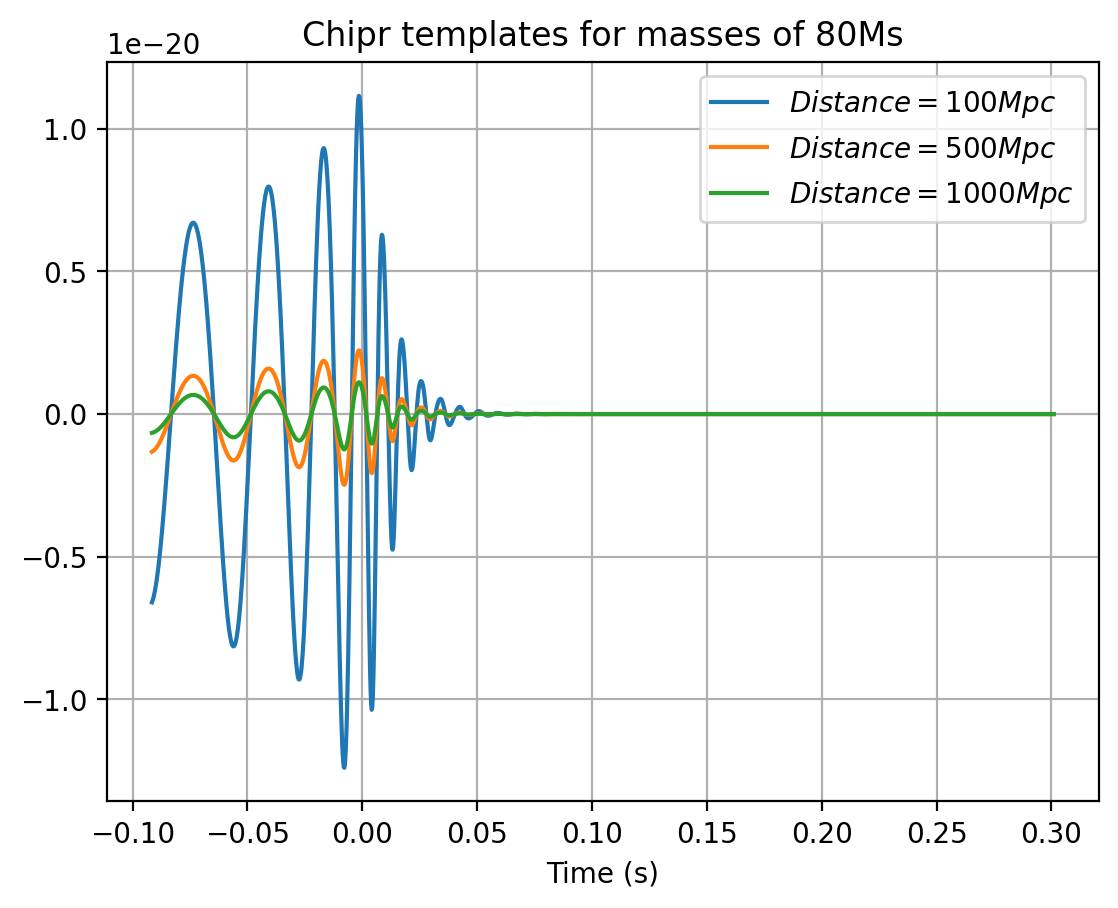

In [9]:
from astropy import units as u

for mass in [13, 20, 80]:
    for dist in [100, 500, 1000]:
        hp, hc = get_td_waveform(approximant="SEOBNRv4HM",
                                 mass1=mass,
                                 mass2=mass,
                                 spin1x=0,  # For v4HM Must be zero lalsimulation/lib/LALSimInspiral.c
                                 spin1y=0,  # Must be zero
                                 spin1z=0.5,
                                 spin2x=0,  # Must be zero
                                 spin2y=0,  # Must be zero
                                 spin2z=0,
                                 distance=dist,
                                 coa_phase=1.2,
                                 inclination=90,
                                 long_asc_nodes=0,
                                 eccentricity=0,
                                 mean_per_ano=0,
                                 delta_t=1.0/4096,
                                 f_lower=25)
    
        pylab.plot(hp.sample_times, hp, label='$Distance=%sMpc$' % dist)
    pylab.legend()
    pylab.grid()
    pylab.title("Chipr templates for masses of "+str(mass)+"Ms")
    pylab.xlabel('Time (s)')
    pylab.show()